<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/Deep_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Autoencoders

In [2]:
%tensorflow_version 2.x


## Batch normalization

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

inpt_dim =  512
ltnt_dim = 256

(x_train, y_train), (x_test, y_test) = imdb.load_data()
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# now with batch norm
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(ltnt_dim)(inpt_vec)
el2 = BatchNormalization()(el1)
encoder = Activation('sigmoid')(el2)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

bn_loss = hist.history['loss']
bn_val_loss = hist.history['val_loss']

del autoencoder
del hist


# now without batch normalization
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(ltnt_dim)(inpt_vec)
encoder = Activation('sigmoid')(el1)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='sigmoid') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=20, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

loss = hist.history['loss']
val_loss = hist.history['val_loss']

del autoencoder
del hist


17465344/17464789 [==============================] - 0s 0us/step
x_train shape: (25000, 512)
x_test shape: (25000, 512)
25000 train samples
25000 test samples
Epoch 1/20
391/391 [==============================] - 3s 8ms/step - loss: -31663.2812 - val_loss: -57534.3906
Epoch 2/20
391/391 [==============================] - 3s 8ms/step - loss: -106007.4609 - val_loss: -123659.0469
Epoch 3/20
391/391 [==============================] - 3s 8ms/step - loss: -191178.3594 - val_loss: -201065.2188
Epoch 4/20
391/391 [==============================] - 3s 8ms/step - loss: -283077.0312 - val_loss: -282201.2188
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: -376242.3438 - val_loss: -363600.6875
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: -468465.3438 - val_loss: -443206.9375
Epoch 7/20
391/391 [==============================] - 3s 8ms/step - loss: -559272.1250 - val_loss: -521656.9375
Epoch 8/20
391/391 [==============================] - 3s 8m

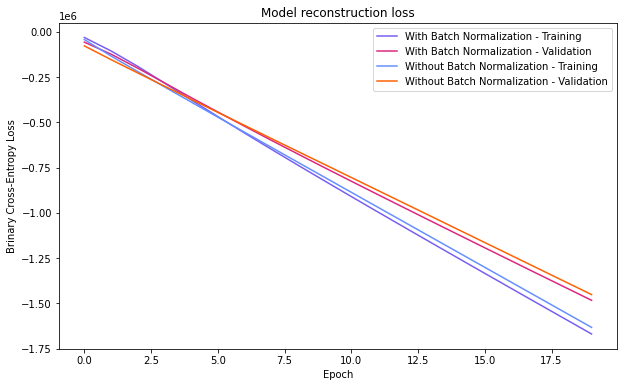

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(bn_loss, color='#785ef0')
plt.plot(bn_val_loss, color='#dc267f')
plt.plot(loss, color='#648fff')
plt.plot(val_loss, color='#fe6100')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['With Batch Normalization - Training', 
            'With Batch Normalization - Validation', 
            'Without Batch Normalization - Training', 
            'Without Batch Normalization - Validation'], loc='upper right')
# plt.savefig('ch.8.ae.imdb.losses.png', dpi=350, bbox_inches='tight')
plt.show()

## Dropout

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

inpt_dim =  512
ltnt_dim = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data()
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# with dropout
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(inpt_dim/2)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dropout(0.1)(el2)
el4 = Dense(ltnt_dim)(el3)
encoder = Activation('relu')(el4)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='relu') (encoder)


# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adagrad')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

bn_loss = hist.history['loss']
bn_val_loss = hist.history['val_loss']

del autoencoder
del hist


# now without dropout
inpt_vec = Input(shape=(inpt_dim,))
el1 = Dense(inpt_dim/2)(inpt_vec)
el2 = Activation('relu')(el1)
el3 = Dense(ltnt_dim)(el2)
encoder = Activation('relu')(el3)

# model that takes input and encodes it into the latent space
latent_ncdr = Model(inpt_vec, encoder)

decoder = Dense(inpt_dim, activation='relu') (encoder)

# model that takes input, encodes it, and decodes it
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adagrad')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64, 
                       shuffle=True, validation_data=(x_test, x_test))

loss = hist.history['loss']
val_loss = hist.history['val_loss']

del autoencoder
del hist


x_train shape: (25000, 512)
x_test shape: (25000, 512)
25000 train samples
25000 test samples
Epoch 1/100
391/391 [==============================] - 3s 8ms/step - loss: -2185.7710 - val_loss: -2554.0166
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: -3327.1111 - val_loss: -3247.6208
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: -3943.0073 - val_loss: -3693.0234
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: -4402.5786 - val_loss: -4060.4492
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: -4799.3755 - val_loss: -4396.8750
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: -5144.6611 - val_loss: -4647.1963
Epoch 7/100
391/391 [==============================] - 3s 7ms/step - loss: -5436.8540 - val_loss: -4898.8647
Epoch 8/100
391/391 [==============================] - 3s 8ms/step - loss: -5711.8418 - val_loss: -5134.0181
Epoch 9/100
391/391 [=============

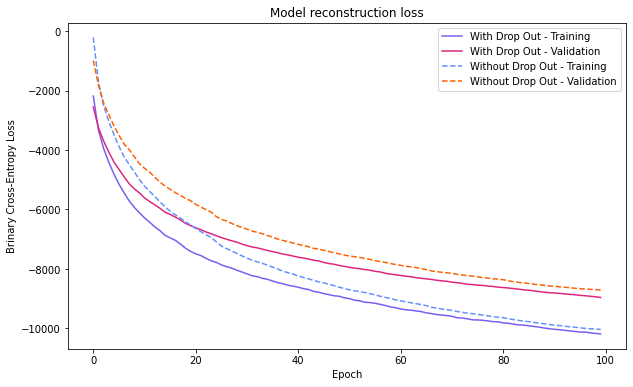

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(bn_loss, color='#785ef0')
plt.plot(bn_val_loss, color='#dc267f')
plt.plot(loss, '--', color='#648fff')
plt.plot(val_loss, '--', color='#fe6100')
plt.title('Model reconstruction loss')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['With Drop Out - Training', 
            'With Drop Out - Validation', 
            'Without Drop Out - Training', 
            'Without Drop Out - Validation'], loc='upper right')
# plt.savefig('ch.8.ae.imdb.losses.dp.png', dpi=350, bbox_inches='tight')
plt.show()
